<h1> P2: Investigate a Dataset </h1>
by Ai Tee Kang 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
titanic_df.describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
(titanic_df["Fare"]==0).sum()

15

<h3>About The Dataset</h3>

The titanic dataset consists of 891 rows of data belonging to individuals who were onboard the Titanic. The data gave information on whether an individual survived the voyage as well as the class, name, gender, age, etc of the individual. The info about this dataset shows that there are a few columns with missing data. These columns are namely 'Age', 'Cabin' and 'Embarked'. Although the column 'Fare' seems to not contain any missing value, there are 15 data points that have 'Fare' as 0. 


<h3>Questions To Be Answered</h3>

Throught the analysis of this dataset, we will try to gain insight to the answers to the below questions.
1. Does the difference in age affects the likelihood to survive?
2. Does gender play a role in the survival of an individual?
3. Which class has a higher chance to survive?


<h3>Handling Missing Values</h3>

<h5>Age:</h5>
In order to answer the question of whether age has any effect on the likelihood of survival, we need to attempt to fill in the missing values that are in the age column. We will accomplish this by extracting the salutations that are present in the 'Name' field. Then we will replace the missing ages with the median age of that salutation group. This will hopefully present a better result than simply replacing with the overall mean age.

In [7]:
# Extract salutations

split_name = pd.DataFrame(titanic_df['Name'].str.split(',').tolist())
split_name = pd.DataFrame(split_name[1].str.split('.',1).tolist())

titanic_df['Salutation'] = split_name[0]


In [8]:
# Fill missing age in new column 'AgeNew'

def fill_age(grp):
    grp['AgeNew'] = np.where(((grp['Age'] ==0) | (grp['Age'].isnull())), grp['Age'].median(),grp['Age'])
    return grp
    

titanic_df = titanic_df.groupby('Salutation').apply(fill_age)


In [9]:
titanic_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,AgeNew
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,30.0


As we can see from the above, PassengerId 6 has NaN as age but is filled in with the median age in column 'AgeNew'. However, as there were many missing age with salutation as 'Mr', there seems to be a spike in age 30 as we filled in the missing age. This is illustrated by the 2 histograms below.

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BB72D30>]], dtype=object)

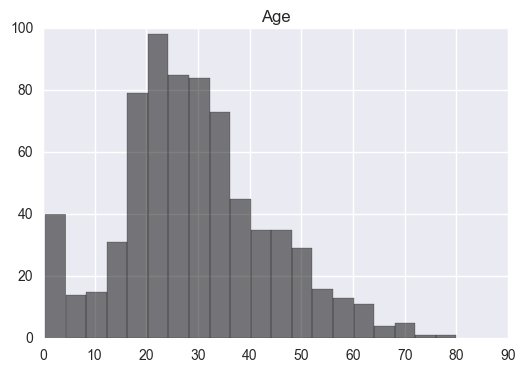

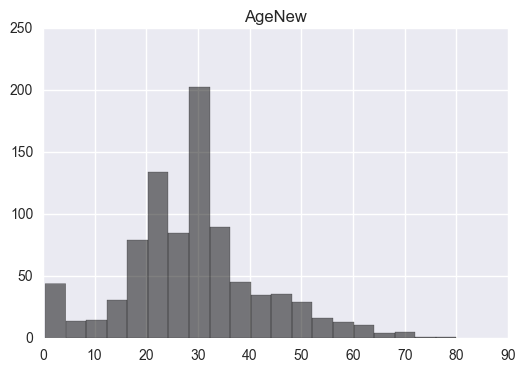

In [10]:
%pylab inline
titanic_df.hist('Age', color='k', alpha=0.5, bins=20); titanic_df.hist('AgeNew', color='k', alpha=0.5, bins=20)

<h5>Fare and Embarked</h5>

Since there are 15 fare with 0 value, we could fill in these by looking at the class of the passenger and where they embarked. However, as we are making use of 'Embarked' to determine fares, we need to first fill in the 2 missing values for 'Embarked'.

In [11]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,AgeNew
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,62.0


The two passengers with missing embarked values are both of class 1 and paid 80 as fare. They even have the same ticket number which we can likely assume that they embarked at the same place.

In [12]:
titanic_groups = titanic_df.groupby(['Pclass', 'Embarked'], as_index=False).median()

In [13]:
print titanic_groups

   Pclass Embarked  PassengerId  Survived   Age  SibSp  Parch     Fare  AgeNew
0       1        C        453.0       1.0  36.5    0.0    0.0  78.2667   35.00
1       1        Q        329.5       0.5  38.5    1.5    0.0  90.0000   38.50
2       1        S        493.0       1.0  37.0    0.0    0.0  52.0000   35.00
3       2        C        390.0       1.0  25.0    1.0    0.0  24.0000   27.00
4       2        Q        323.0       1.0  43.5    0.0    0.0  12.3500   30.00
5       2        S        439.0       0.0  30.0    0.0    0.0  13.5000   30.00
6       3        C        483.0       0.0  20.0    0.0    0.0   7.8958   27.75
7       3        Q        400.5       0.0  21.5    0.0    0.0   7.7500   27.00
8       3        S        432.0       0.0  25.0    0.0    0.0   8.0500   26.00


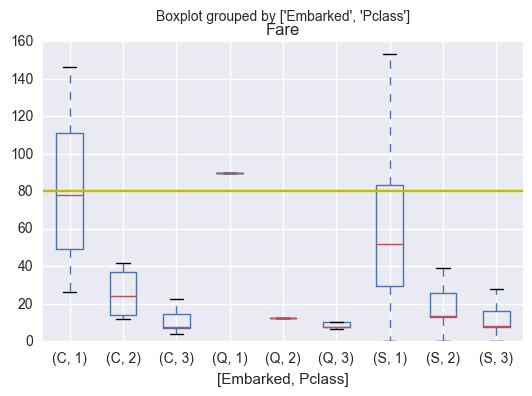

In [14]:
titanic_df.boxplot(column='Fare', by=['Embarked', 'Pclass'], showfliers=False); plt.axhline(80, color='y')

The groupby info above and the boxplot shows that for passengers in class 1 and paying around 80 as fare mostly embarked at C. We will therefore go ahead and fill in the 2 missing values as 'C'.

In [15]:
titanic_df.loc[61,'Embarked'] = 'C'
titanic_df.loc[829,'Embarked'] = 'C'

In [16]:
titanic_df.iloc[[61,829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,AgeNew
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C,Miss,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C,Mrs,62.0


Next we will fill in 'Fare' with 0 values with the median from 'Pclass' and 'Embarked'. This will be done in a new column called 'FareNew'.

In [17]:
def fill_fare(grp):
    grp['FareNew'] = np.where(((grp['Fare'] ==0) | (grp['Fare'].isnull())), grp['Fare'].median(),grp['Fare'])
    return grp
    
titanic_df = titanic_df.groupby(['Pclass', 'Embarked']).apply(fill_fare)


In [18]:
(titanic_df["FareNew"]==0).sum()

0

In [19]:
titanic_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,AgeNew,FareNew
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35.0,8.0500
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,30.0,8.4583


As for the missing values in 'Cabin', there are too many missing (687) for us to do anything useful with it. Therefore we will not be using this column in our analysis.

<h3>Analysis</h3>

We will investigate how age, gender and class affects the likelihood of survival. From the column of 'Salutation' extracted from the names of the passengers, we can see that there are 4 major groups of passengers. They are 'Mr', 'Mrs', 'Miss', and 'Master'. From the below graph, we can see how these 4 groups survived the voyage. It is clear that 'Master', 'Miss' and 'Mrs' have a higher survival rate with taller green than red bars. 'Mr', on the other hand, has a way higher red bar and a low green bar. This shows that males are more unlikely to survive where children and female have a higher rate of survival.




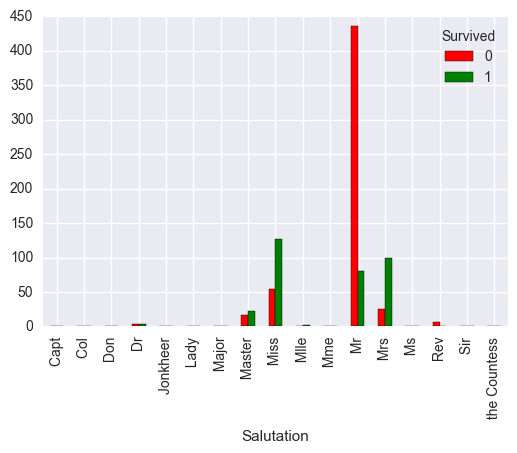

In [20]:
survived_df = titanic_df.groupby(['Survived','Salutation']).size().unstack('Survived')
survived_df[[0,1]].plot(kind='bar', color=['red','green'])

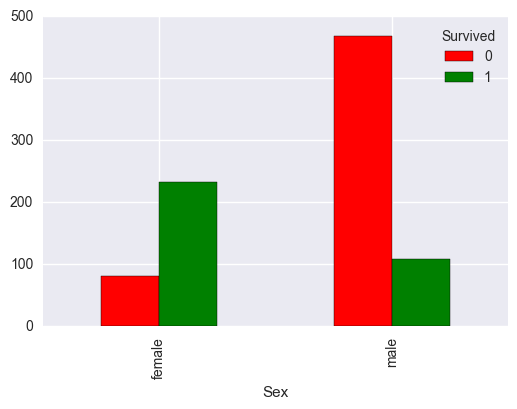

In [21]:
sur_df = titanic_df.groupby(['Survived','Sex']).size().unstack('Survived')
sur_df[[0,1]].plot(kind='bar', color=['red','green'])

The above plot confirms that females have a higher proportion of survivors as compared to the males. This show that females are more likely to survive whereas males are not. 

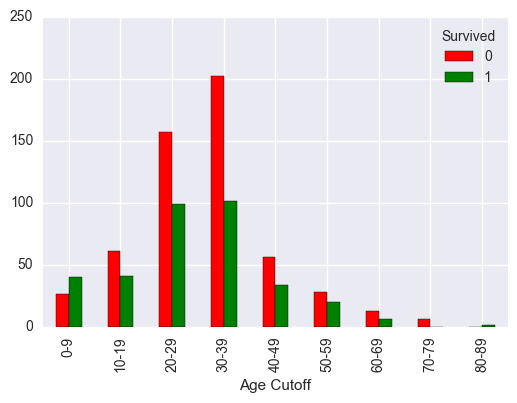

In [22]:
intervals = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']
cuts = [x for x in range(0, int(np.max(titanic_df.AgeNew) + 11)) if x % 10 == 0]
titanic_df['Age Cutoff'] = pd.cut(titanic_df['AgeNew'], cuts, right=False, labels=intervals)

sur_df = titanic_df.groupby(['Survived','Age Cutoff']).size().unstack('Survived')
sur_df[[0,1]].plot(kind='bar', color=['red','green'])


By plotting the age group of passengers according to the number that survived, we can see that only the very young (age 0-9 yrs) have a higher proportion of survivors as opposed to those in the same age that did not survive. This shows that children have a higher rate of survival.

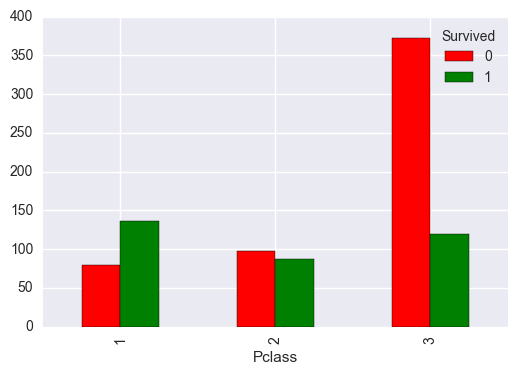

In [23]:
sur_df = titanic_df.groupby(['Survived','Pclass']).size().unstack('Survived')
sur_df[[0,1]].plot(kind='bar', color=['red','green'])

The above plot shows that passengers of class 1 have a higher proportion of survivors. This is in contrast to those in class 3 where the non-survival portion is higher as depicted by the taller red bar. This shows that class does play a part in the likelihood to survive.

[<matplotlib.text.Text at 0xcef9da0>, <matplotlib.text.Text at 0xcf51208>]

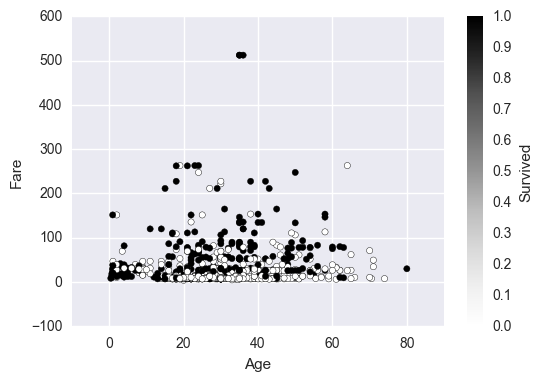

In [24]:
ax = titanic_df.plot(kind='scatter', x='AgeNew', y='FareNew', c='Survived',sharex=False)
ax.set(xlabel='Age', ylabel='Fare')

In [25]:
fare_grp = titanic_df.groupby('Pclass').mean()
fare_grp.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,AgeNew,FareNew
Pclass,,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,37.309815,85.358391
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,29.787120,21.102401
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,25.757475,13.741131


The above scatter plot between fare and age shows that passengers who survived (black dots) tend to pay higher fare and are lower in age. The above table shows that class 1 passengers paid higher fares on average. Since class 1 passengers tends to pay a higher fares, this concludes that class 1 passengers have a higher chance of survival. This also confirms our finding above that children under age 10 are more likely to survive as the cluster of black dots are located under 10.


<h3>Conclusion</h3>

The above analysis of the Titanic data showed that age, gender and class have an effect on the likelihood to survive. Children under the age of 10 years old are more likely to survive as compared to adults. Female are also more likely to survive as compared to males. Passengers of class 1 have a higher survival rate as compared to the other 2 classes.